# Time Series Decomposition: Breaking Down the Components

## Learning Objectives
By the end of this notebook, you will be able to:
1. Understand why decomposition is useful for time series analysis
2. Use Python to decompose time series into trend, seasonality, and noise
3. Interpret decomposition results
4. Choose between additive and multiplicative decomposition
5. Use decomposition to inform model selection


## Introduction: Why Decompose Time Series?

In the previous notebooks, we learned to identify trend, seasonality, and noise visually. Now we'll use Python tools to automatically separate these components.

**Why is this useful?**

1. **Understand Structure:** See each component separately
2. **Diagnose Problems:** Identify what's driving your data
3. **Choose Models:** Different components require different forecasting methods
4. **Communicate Findings:** Show stakeholders what's really happening

**Think of it like this:** Instead of looking at a mixed salad, decomposition separates the lettuce, tomatoes, and dressing so you can see each ingredient clearly!

**Real-World Example:** A retail manager might see sales going up and down, but decomposition shows:
- The trend: Business is growing 5% per year
- The seasonality: December always spikes 30%
- The noise: Random events cause small fluctuations

This helps them make better decisions!


In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Set plotting style
plt.style.use('default')

print("Libraries imported successfully")


Libraries imported successfully


In [8]:
# Load and prepare the data
data = pd.read_csv('AirPassengers.csv')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

print("✅ Data loaded successfully")
print(f"Date range: {data.index.min()} to {data.index.max()}")


✅ Data loaded successfully
Date range: 1949-01-01 00:00:00 to 1960-12-01 00:00:00


## Section 1: Understanding Decomposition

### What Decomposition Does

Decomposition breaks a time series into three parts:
1. **Trend** - The long-term direction
2. **Seasonal** - The repeating pattern
3. **Residual** - Everything else (noise)

### Additive vs Multiplicative

Remember from the previous notebook:
- **Additive:** Components are added together (Trend + Seasonality + Noise)
- **Multiplicative:** Components multiply together (Trend × Seasonality × Noise)

**How to choose?**
- If seasonal fluctuations stay the same size → Additive
- If seasonal fluctuations grow with the trend → Multiplicative

Our airline data has growing seasonal fluctuations, so we'll use **multiplicative** decomposition.


## Section 2: Performing Multiplicative Decomposition

Let's decompose our airline passenger data using Python's `seasonal_decompose` function.


In [9]:
# Perform multiplicative decomposition
# The 'model' parameter tells Python whether to use additive or multiplicative
decomposition = seasonal_decompose(data['#Passengers'], 
                                    model='multiplicative', 
                                    period=12)  # 12 months = yearly seasonality

print("✅ Decomposition completed")
print("\nThe decomposition has separated the data into:")
print("1. Trend component")
print("2. Seasonal component") 
print("3. Residual component")


✅ Decomposition completed

The decomposition has separated the data into:
1. Trend component
2. Seasonal component
3. Residual component


### Visualizing the Decomposition

The best way to understand decomposition is to see it visually. Let's plot all four components together:


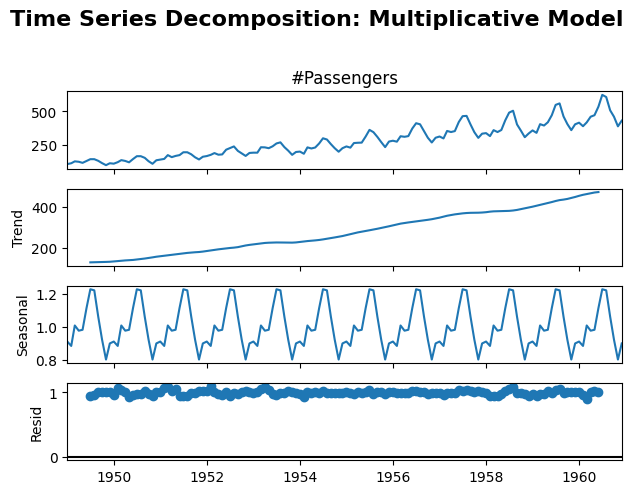


📊 What to look for in each panel:
1. OBSERVED (top): The original data
2. TREND (second): The long-term direction - should be smooth and upward
3. SEASONAL (third): The repeating pattern - should cycle every 12 months
4. RESIDUAL (bottom): The noise - should be small and random


In [10]:
# Plot the decomposition
# This creates a 4-panel plot showing original, trend, seasonal, and residual
decomposition.plot()
plt.suptitle('Time Series Decomposition: Multiplicative Model', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n📊 What to look for in each panel:")
print("1. OBSERVED (top): The original data")
print("2. TREND (second): The long-term direction - should be smooth and upward")
print("3. SEASONAL (third): The repeating pattern - should cycle every 12 months")
print("4. RESIDUAL (bottom): The noise - should be small and random")


### Examining Each Component Separately

Let's look at each component individually to understand what they tell us:


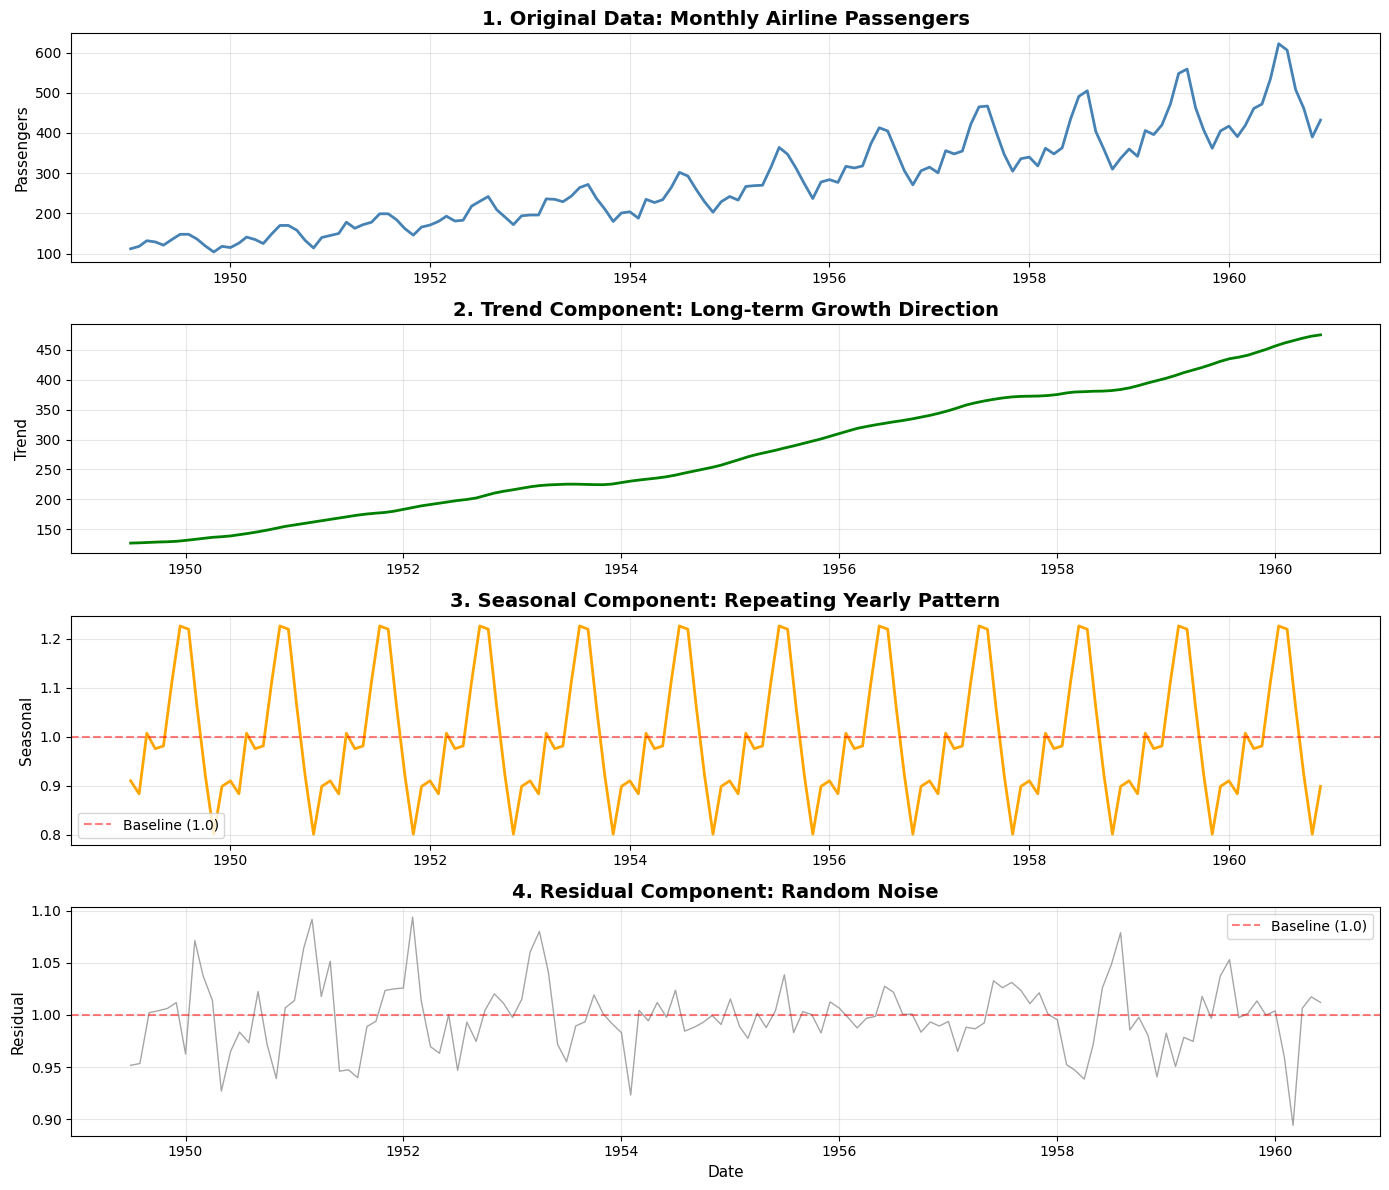


💡 Key Interpretations:
TREND: Shows steady upward growth - the airline is expanding
SEASONAL: Values above 1.0 = above average, below 1.0 = below average
RESIDUAL: Should be close to 1.0 with small random fluctuations
         If residual has patterns, our decomposition might be missing something


In [11]:
# Extract each component
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Create a comprehensive plot
fig, axes = plt.subplots(4, 1, figsize=(14, 12))

# Original data
axes[0].plot(data.index, data['#Passengers'], linewidth=2, color='steelblue')
axes[0].set_title('1. Original Data: Monthly Airline Passengers', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Passengers', fontsize=11)
axes[0].grid(True, alpha=0.3)

# Trend component
axes[1].plot(trend.index, trend.values, linewidth=2, color='green')
axes[1].set_title('2. Trend Component: Long-term Growth Direction', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Trend', fontsize=11)
axes[1].grid(True, alpha=0.3)

# Seasonal component
axes[2].plot(seasonal.index, seasonal.values, linewidth=2, color='orange')
axes[2].set_title('3. Seasonal Component: Repeating Yearly Pattern', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Seasonal', fontsize=11)
axes[2].grid(True, alpha=0.3)
axes[2].axhline(y=1.0, color='red', linestyle='--', alpha=0.5, label='Baseline (1.0)')
axes[2].legend()

# Residual component
axes[3].plot(residual.index, residual.values, linewidth=1, color='gray', alpha=0.7)
axes[3].set_title('4. Residual Component: Random Noise', fontsize=14, fontweight='bold')
axes[3].set_ylabel('Residual', fontsize=11)
axes[3].set_xlabel('Date', fontsize=11)
axes[3].grid(True, alpha=0.3)
axes[3].axhline(y=1.0, color='red', linestyle='--', alpha=0.5, label='Baseline (1.0)')
axes[3].legend()

plt.tight_layout()
plt.show()

print("\n💡 Key Interpretations:")
print("TREND: Shows steady upward growth - the airline is expanding")
print("SEASONAL: Values above 1.0 = above average, below 1.0 = below average")
print("RESIDUAL: Should be close to 1.0 with small random fluctuations")
print("         If residual has patterns, our decomposition might be missing something")


## Section 3: Understanding the Seasonal Component

The seasonal component is particularly interesting. Let's examine it more closely:


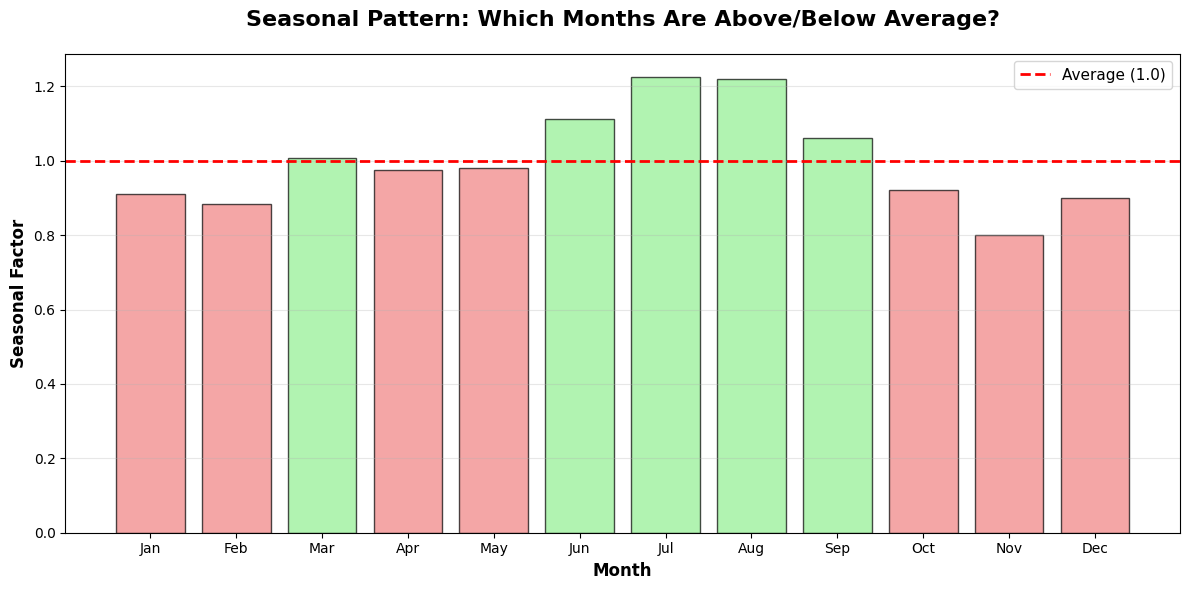


📊 Seasonal Pattern Analysis:
Values above 1.0 = Above average passenger counts
Values below 1.0 = Below average passenger counts

Peak month: Jul (1.227)
Low month: Nov (0.801)

💡 Business Insight:
Summer months (Jun-Aug) have the highest passenger counts
Winter months (Nov-Feb) have the lowest passenger counts
This makes sense - people travel more in summer


In [12]:
# Look at the seasonal pattern for one year
# Extract one year of seasonal data
one_year_seasonal = seasonal.iloc[0:12]

# Create a bar chart to see the seasonal pattern clearly
plt.figure(figsize=(12, 6))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
colors = ['lightcoral' if x < 1.0 else 'lightgreen' for x in one_year_seasonal.values]

plt.bar(months, one_year_seasonal.values, color=colors, alpha=0.7, edgecolor='black')
plt.axhline(y=1.0, color='red', linestyle='--', linewidth=2, label='Average (1.0)')
plt.title('Seasonal Pattern: Which Months Are Above/Below Average?', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Seasonal Factor', fontsize=12, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\n📊 Seasonal Pattern Analysis:")
print("Values above 1.0 = Above average passenger counts")
print("Values below 1.0 = Below average passenger counts")
print(f"\nPeak month: {months[np.argmax(one_year_seasonal.values)]} ({one_year_seasonal.max():.3f})")
print(f"Low month: {months[np.argmin(one_year_seasonal.values)]} ({one_year_seasonal.min():.3f})")
print(f"\n💡 Business Insight:")
print("Summer months (Jun-Aug) have the highest passenger counts")
print("Winter months (Nov-Feb) have the lowest passenger counts")
print("This makes sense - people travel more in summer")


## Section 4: How Decomposition Helps Model Selection

Understanding the components helps us choose the right forecasting model:

### What Each Component Tells Us

1. **Strong Trend:**
   - Need models that can handle trends
   - Might need differencing (we'll learn this later)
   - ARIMA models work well

2. **Strong Seasonality:**
   - Need seasonal models (SARIMA)
   - Or models that explicitly handle seasonality
   - Simple models might miss this

3. **Large Residuals:**
   - Data is noisy
   - Harder to forecast accurately
   - Might need more complex models

4. **Small Residuals:**
   - Data follows patterns well
   - Simpler models might work
   - Good forecasting potential

### Our Data Analysis

Based on our decomposition:
- ✅ **Strong upward trend** → Need trend-handling models
- ✅ **Clear seasonality** → Need seasonal models (SARIMA)
- ✅ **Small residuals** → Data is relatively predictable
- ✅ **Multiplicative pattern** → Need multiplicative models

**Conclusion:** We should use SARIMA (Seasonal ARIMA) for forecasting this data!

**Think About It:** If you had data with no trend and no seasonality, what kind of model would you use?


## Summary: Key Takeaways

This notebook showed you how to decompose time series data:

### What We Learned

1. **Decomposition Purpose:**
   - Separates trend, seasonality, and noise
   - Helps understand what's driving the data
   - Guides model selection

2. **Additive vs Multiplicative:**
   - Additive: Seasonal fluctuations stay same size
   - Multiplicative: Seasonal fluctuations grow with trend
   - Our data is multiplicative

3. **Component Interpretation:**
   - Trend: Long-term direction
   - Seasonal: Repeating patterns (values relative to 1.0)
   - Residual: Random noise (should be small and random)

4. **Model Selection:**
   - Strong trend → Need trend-handling models
   - Strong seasonality → Need seasonal models (SARIMA)
   - Small residuals → Good forecasting potential

### Key Insights

- **Decomposition is diagnostic:** It helps you understand your data
- **Visual inspection matters:** Always plot the decomposition
- **Component size matters:** Large residuals = harder to forecast
- **Pattern type matters:** Additive vs multiplicative affects model choice

### Why This Matters

Decomposition helps you:
- Choose the right forecasting model
- Understand what's driving your data
- Set realistic expectations for forecast accuracy
- Communicate findings to stakeholders
